In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df_train = pd.read_csv("C:/Users/User10/Desktop/fyp/dataset/bankruptcyTrain.csv")

In [3]:
df_train.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


Class 0: 9797
Class 1: 203
Proportion: 48.26 : 1


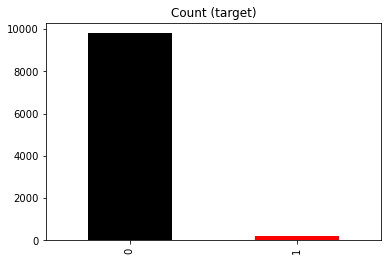

In [4]:
target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)',color=['black', 'red']);


In [5]:
labels = df_train.columns[0:64]
x = df_train[labels]
y = df_train['target']
labels

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (8000, 64)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 64)
Number transactions y_test dataset:  (2000,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [8]:
def run_randomForest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ',accuracy_score(y_test, y_pred))

In [9]:
model = RandomForestClassifier(n_estimators= 100)
model.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [10]:
test_accuracy = model.score(x_test,y_test)
print("Accuracy: %.2f%%" % (test_accuracy * 100.0))

Accuracy: 97.40%


In [11]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.40%


Confusion matrix:
 [[1946    2]
 [  50    2]]


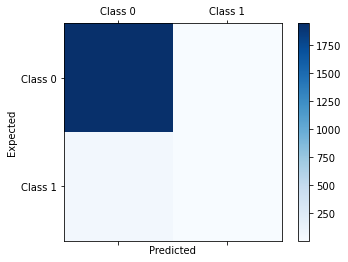

In [12]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [13]:
#Oversampling

from imblearn.over_sampling import SMOTE

In [14]:
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8000, 64)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 64)
Number transactions y_test dataset:  (2000,)


Before OverSampling, counts of label '1': 151
Before OverSampling, counts of label '0': 7849 

After OverSampling, the shape of train_X: (15698, 64)
After OverSampling, the shape of train_y: (15698,) 

After OverSampling, counts of label '1': 7849
After OverSampling, counts of label '0': 7849


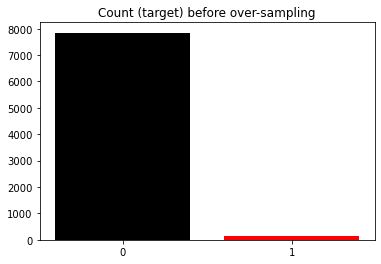

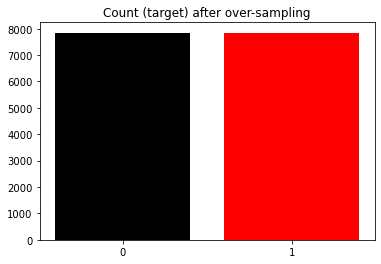

In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

y1 = [7849,151]
x1 = [0,1]
plt.bar(x1,y1,color=['black', 'red'])
plt.xticks(x1)
plt.title('Count (target) before over-sampling')
plt.show()
y = [7849,7849]
x = [0,1]
plt.bar(x,y,color=['black', 'red'])
plt.xticks(x)
plt.title('Count (target) after over-sampling')
plt.show()


In [16]:
model_res = RandomForestClassifier(n_estimators= 100)
model_res.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [17]:
test_accuracy = model_res.score(x_test,y_test)
print("Accuracy: %.2f%%" % (test_accuracy * 100.0))

Accuracy: 96.75%


In [18]:
y_pred = model_res.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.75%


Confusion matrix:
 [[1923   25]
 [  40   12]]


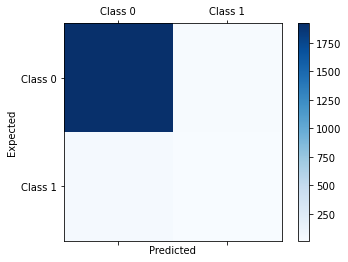

In [19]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [20]:
#selectedFeature before oversampling
from sklearn.feature_selection import RFE
for index in range(1, 65):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(x_train, y_train.values.ravel())
    x_train_rfe = sel.transform(x_train)
    x_test_rfe = sel.transform(x_test)
    print('Selected Feature : ', index)
    run_randomForest(x_train_rfe, x_test_rfe, y_train.values.ravel(), y_test.values.ravel())
    print()


Selected Feature :  1
Accuracy:  0.9665

Selected Feature :  2
Accuracy:  0.9725

Selected Feature :  3
Accuracy:  0.973

Selected Feature :  4
Accuracy:  0.9725

Selected Feature :  5
Accuracy:  0.972

Selected Feature :  6
Accuracy:  0.9745

Selected Feature :  7
Accuracy:  0.9745

Selected Feature :  8
Accuracy:  0.974

Selected Feature :  9
Accuracy:  0.974

Selected Feature :  10
Accuracy:  0.9755

Selected Feature :  11
Accuracy:  0.9735

Selected Feature :  12
Accuracy:  0.9755

Selected Feature :  13
Accuracy:  0.9735

Selected Feature :  14
Accuracy:  0.974

Selected Feature :  15
Accuracy:  0.9745

Selected Feature :  16
Accuracy:  0.974

Selected Feature :  17
Accuracy:  0.975

Selected Feature :  18
Accuracy:  0.9745

Selected Feature :  19
Accuracy:  0.975

Selected Feature :  20
Accuracy:  0.974

Selected Feature :  21
Accuracy:  0.974

Selected Feature :  22
Accuracy:  0.975

Selected Feature :  23
Accuracy:  0.9735

Selected Feature :  24
Accuracy:  0.9745

Selected Fea

In [21]:
#Selected Feature after oversampling

for index in range(1, 65):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(x_train_res, y_train_res)
    x_train_rfe = sel.transform(x_train_res)
    x_test_rfe = sel.transform(x_test)
    print('Selected Feature : ', index)
    run_randomForest(x_train_rfe, x_test_rfe, y_train_res, y_test.values.ravel())
    print()


Selected Feature :  1
Accuracy:  0.6545

Selected Feature :  2
Accuracy:  0.7875

Selected Feature :  3
Accuracy:  0.8185

Selected Feature :  4
Accuracy:  0.856

Selected Feature :  5
Accuracy:  0.883

Selected Feature :  6
Accuracy:  0.903

Selected Feature :  7
Accuracy:  0.9125

Selected Feature :  8
Accuracy:  0.9175

Selected Feature :  9
Accuracy:  0.9435

Selected Feature :  10
Accuracy:  0.95

Selected Feature :  11
Accuracy:  0.949

Selected Feature :  12
Accuracy:  0.9515

Selected Feature :  13
Accuracy:  0.951

Selected Feature :  14
Accuracy:  0.957

Selected Feature :  15
Accuracy:  0.9545

Selected Feature :  16
Accuracy:  0.957

Selected Feature :  17
Accuracy:  0.958

Selected Feature :  18
Accuracy:  0.9595

Selected Feature :  19
Accuracy:  0.9585

Selected Feature :  20
Accuracy:  0.9605

Selected Feature :  21
Accuracy:  0.9565

Selected Feature :  22
Accuracy:  0.961

Selected Feature :  23
Accuracy:  0.96

Selected Feature :  24
Accuracy:  0.963

Selected Featur

In [22]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 64)
sel.fit(x_train_res, y_train_res)
x_train_rfe = sel.transform(x_train_res)
x_test_rfe = sel.transform(x_test)
print('Selected Feature : ', 64)
run_randomForest(x_train_rfe, x_test_rfe, y_train_res, y_test.values.ravel())
print()

Selected Feature :  64
Accuracy:  0.9665



In [23]:
features = x_train_res.columns[sel.get_support()]
features


Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [24]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 54)
sel.fit(x_train_res, y_train_res)
x_train_rfe = sel.transform(x_train_res)
x_test_rfe = sel.transform(x_test)
print('Selected Feature : ', 54)
run_randomForest(x_train_rfe, x_test_rfe, y_train_res, y_test.values.ravel())
print()

Selected Feature :  54
Accuracy:  0.965



In [25]:
features = x_train_res.columns[sel.get_support()]
features

Index(['Attr1', 'Attr2', 'Attr3', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9',
       'Attr10', 'Attr12', 'Attr13', 'Attr15', 'Attr16', 'Attr17', 'Attr18',
       'Attr19', 'Attr20', 'Attr21', 'Attr23', 'Attr24', 'Attr25', 'Attr26',
       'Attr27', 'Attr29', 'Attr30', 'Attr32', 'Attr34', 'Attr35', 'Attr37',
       'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr44', 'Attr45',
       'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52',
       'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59',
       'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [26]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 41)
sel.fit(x_train_res, y_train_res)
x_train_rfe = sel.transform(x_train_res)
x_test_rfe = sel.transform(x_test)
print('Selected Feature : ', 41)
run_randomForest(x_train_rfe, x_test_rfe, y_train_res, y_test.values.ravel())
print()

Selected Feature :  41
Accuracy:  0.9665



In [27]:
features = x_train_res.columns[sel.get_support()]
features

Index(['Attr1', 'Attr2', 'Attr5', 'Attr6', 'Attr9', 'Attr12', 'Attr13',
       'Attr15', 'Attr16', 'Attr17', 'Attr19', 'Attr20', 'Attr23', 'Attr24',
       'Attr25', 'Attr26', 'Attr27', 'Attr29', 'Attr30', 'Attr32', 'Attr34',
       'Attr35', 'Attr37', 'Attr38', 'Attr39', 'Attr41', 'Attr42', 'Attr45',
       'Attr46', 'Attr48', 'Attr49', 'Attr50', 'Attr53', 'Attr54', 'Attr55',
       'Attr56', 'Attr58', 'Attr59', 'Attr61', 'Attr62', 'Attr64'],
      dtype='object')

In [28]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 36)
sel.fit(x_train_res, y_train_res)
x_train_rfe = sel.transform(x_train_res)
x_test_rfe = sel.transform(x_test)
print('Selected Feature : ', 41)
run_randomForest(x_train_rfe, x_test_rfe, y_train_res, y_test.values.ravel())
print()

Selected Feature :  41
Accuracy:  0.963



In [29]:
features = x_train_res.columns[sel.get_support()]
features

Index(['Attr1', 'Attr2', 'Attr5', 'Attr6', 'Attr9', 'Attr12', 'Attr13',
       'Attr15', 'Attr16', 'Attr17', 'Attr19', 'Attr20', 'Attr23', 'Attr25',
       'Attr26', 'Attr27', 'Attr29', 'Attr30', 'Attr32', 'Attr34', 'Attr35',
       'Attr37', 'Attr38', 'Attr39', 'Attr41', 'Attr46', 'Attr48', 'Attr49',
       'Attr50', 'Attr53', 'Attr55', 'Attr58', 'Attr59', 'Attr61', 'Attr62',
       'Attr64'],
      dtype='object')

In [30]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 13)
sel.fit(x_train_res, y_train_res)
x_train_rfe = sel.transform(x_train_res)
x_test_rfe = sel.transform(x_test)
print('Selected Feature : ', 13)
run_randomForest(x_train_rfe, x_test_rfe, y_train_res, y_test.values.ravel())
print()

Selected Feature :  13
Accuracy:  0.951



In [31]:
features = x_train_res.columns[sel.get_support()]
features

Index(['Attr5', 'Attr6', 'Attr9', 'Attr13', 'Attr16', 'Attr25', 'Attr26',
       'Attr27', 'Attr29', 'Attr34', 'Attr39', 'Attr50', 'Attr58'],
      dtype='object')

In [32]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 3)
sel.fit(x_train_res, y_train_res)
x_train_rfe = sel.transform(x_train_res)
x_test_rfe = sel.transform(x_test)
print('Selected Feature : ', 3)
run_randomForest(x_train_rfe, x_test_rfe, y_train_res, y_test.values.ravel())
print()

Selected Feature :  3
Accuracy:  0.8185



In [33]:
features = x_train_res.columns[sel.get_support()]
features

Index(['Attr16', 'Attr26', 'Attr34'], dtype='object')

In [34]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 1)
sel.fit(x_train_res, y_train_res)
x_train_rfe = sel.transform(x_train_res)
x_test_rfe = sel.transform(x_test)
print('Selected Feature : ', 1)
run_randomForest(x_train_rfe, x_test_rfe, y_train_res, y_test.values.ravel())
print()

Selected Feature :  1
Accuracy:  0.6545



In [35]:
features = x_train_res.columns[sel.get_support()]
features

Index(['Attr26'], dtype='object')